In [199]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [200]:
#Launch get_pages(int) to launch the program

In [238]:
#Lists which will store our datas during the script work, initialize them before launch program
pages=[]
emp=[]
price=[]
areas=[]
type_h=[]
description=[]
pieces_nb=[]
urls=[]
code = []
dep=[]

In [202]:
#Allows us to split zip_code from the emplacement
def zip_code(x):
    m=[]
    n=[]
    for c in x:
        m.append(re.findall('\s\d{1,2}|\(\d{2}\)|\(\d+\)',c))
     
    
    for c in m:
        n.append(str(''.join(c)))
   

    for s in n:
        code.append(s.replace('(','').replace(')','').replace(' ',''))
        

        
    for i in range(len(code)):
        if code[i] == '1':
            code[i] = '75001'
        if code[i] == '2':
            code[i] = '75002'
        if code[i] == '3':
            code[i] = '75003'
        if code[i] == '4':
            code[i] = '75004'
        if code[i] == '5':
            code[i] = '75005'
        if code[i] == '6':
            code[i] = '75006'
        if code[i] == '7':
            code[i] = '75007'
        if code[i] == '8':
            code[i] = '75008'
        if code[i] == '9':
            code[i] = '75009'
        if code[i] == '10':
            code[i] = '75010'
        if code[i] == '11':
            code[i] = '75011'
        if code[i] == '12':
            code[i] = '75012'
        if code[i] == '13':
            code[i] = '75013'
        if code[i] == '14':
            code[i] = '75014'
        if code[i] == '15':
            code[i] = '75015'
        if code[i] == '16':
            code[i] = '75016'
        if code[i] == '17':
            code[i] = '75017'
        if code[i] == '18':
            code[i] = '75018'
        if code[i] == '19':
            code[i] = '75019'
        if code[i] == '20':
            code[i] = '75020'

            
#Create the departements
def dep_(x):
    z = []
    a = []
    for i in x:
        z.append(re.findall('^\d{2}',i))
    for i in z:
        dep.append(str(''.join(i)))

In [203]:
def na_to_np(x,y) :
    x[y] = x[y].replace('NaN',np.NaN)
    

In [204]:
#Script that will convert our lists into dataframe and csv

def lists_to_df(a,b,c,d,e,f,g,h):
    names = ['Type', 'Nombre de Pièces', 'Surface (m²)','Prix (€)','Departement','Code Postal','Emplacement', 'Description']
    immo = pd.DataFrame(columns = names)
    
    immo['Type'] = a
    immo['Nombre de Pièces'] = b
    immo['Surface (m²)'] = c
    immo['Prix (€)'] = d
    immo['Departement'] = e
    immo['Code Postal'] = f
    immo['Emplacement'] = g
    immo['Description'] = h
    
    na_to_np(immo,'Nombre de Pièces')
    na_to_np(immo,'Code Postal')
    na_to_np(immo,'Surface (m²)')
    na_to_np(immo,'Departement')
    na_to_np(immo,'Type')
    na_to_np(immo,'Description')
    na_to_np(immo,'Emplacement')
    na_to_np(immo,'Prix (€)')
    
    immo = immo.dropna()
    immo = immo.drop_duplicates()
    immo = immo.fillna(0)
    
    immo.to_csv('ParuVend.csv', index = False, header = True)
    

In [236]:
#Parse and clean data
def parse_pages(x, soup) :
    #This variable allows us to fill the unreachables values and have lists of same length to convert them into dataframe later
    bot = 'NaN'
    
    
    #This variables will be used in loops to help us select data we need
    prices = soup.find_all('div', class_='ergov3-priceannonce')
    title = soup.find_all('div', class_="ergov3-h3")
    desc = soup.find_all('p',class_='txt-long')
    
    #Box where we store all type of houses available
    model_title = 'Appartement|Maison|Hôtel|T2|T3|T1|T4|T5|T6|Duplex/triplex|Loft|Villa|Atelier|studio'
    
    #Avoid local variable error
    global i
    
    #Loop to reach and clean real estate prices data
    for p in prices :
        price.append((p.text.replace("€", "").replace("\r","").replace("\n","").replace('*','').replace(" ", "")))
            
    #Reaching Cities names and zip codes        
    for c in title:
        if c.find('cite'):
            emp.append(c.find('cite').text.replace('\r','').replace('\n','').replace("\t",""))
        else:
            emp.append(bot)

    #Reaching houses type 
    for t in title:
        
        if t.find('span'):
            for i in re.findall(model_title, t.find('span').text):
                type_h.append(i)
            if i not in re.findall(model_title, t.find('span').text):
                type_h.append(bot)
    
    #Reaching number of pieces in a house
    for b in title :

        if b.find('span'):
            
            for i in re.findall('\n[0-9]{1,2}| [0-9]{1,2} p|[0-9]{1,2}p', b.text):
                
                pieces_nb.append(int(i.replace(' p','').replace('\n','').replace("p","")))
                
            if i not in re.findall('\n[0-9]{1,2}| [0-9]{1,2} p|[0-9]{1,2}p', b.text):
                pieces_nb.append(bot)
   
    #Reaching areas of houses            
    for b in title:
        if b.find('span'):
            for i in (re.findall('\t[0-9]+m|\t[0-9]+ m|[0-9]+ m|[0-9]+m', b.text)):
                areas.append(i.replace(' m','').replace('m',''))
                
            if i not in (re.findall('\t[0-9]+m|\t[0-9]+ m|[0-9]+ m|[0-9]+m', b.text)) :
                areas.append(bot) 
        
        

    #Reaching descriptions of houses
    for d in desc:
        description.append(d.text.replace("\r","").replace("\n",""))

In [226]:
#Function to change pages
def get_pages(count=int):
    for pages_nb in range(1,count+1):
        url = f"https://www.paruvendu.fr/immobilier/annonceimmofo/liste/listeAnnonces?%20tt=1&at=1&nbp0=99&pa=FR&lo=75,77,78,91,92,93,94,95&lol=0&ray=50&p={pages_nb}"
        urls.append(url)
    loop_pages(urls,emp,code)
    

#Script where we put urls list to enable all the functions

#x stands for urls, y for emp and z for code
def loop_pages(x,y,z):
    for n in range(len(x)):
        page = requests.get(x[n])
        soup = bs(page.content, 'html.parser')
        parse_pages(x[n], soup)
        pages.append(page)
    zip_code(y)
    dep_(z)
    lists_to_df(type_h,pieces_nb,areas,price,dep,code,emp,description)
        


In [207]:
#Launch program

In [239]:
get_pages(500)

In [215]:
get_pages(1)

<!DOCTYPE html>

<html lang="fr" xml:lang="fr" xmlns="http://www.w3.org/1999/xhtml">
<head>
<title>Vente Ile-de-France</title>
<meta content="Vente, Ile-de-France" name="keywords"/>
<meta content="ParuVendu.fr Vente Ile-de-France" name="description"/>
<meta content="application/xhtml+xml;charset=utf-8" http-equiv="Content-Type"/>
<meta content="noindex, nofollow" name="robots"/>
<meta content="itHgpWxxrlKFfnMsWsdCvGD/mo3m7u6G7RfGyFJ/YO8=" name="verify-v1"/>
<meta content="d9db8d3dddac86c4" name="y_key"/>
<meta content="307E185BE71AC74B07A092B4278FB37F" name="msvalidate.01"/>
<meta content="global" name="classification"/>
<meta content="global" name="distribution"/>
<meta content="general" name="rating"/>
<meta content="document" name="resource-type"/>
<meta content="ParuVendu.fr" name="author"/>
<meta content="© 2012 ParuVendu.fr" name="copyright"/>
<meta content="ParuVendu.fr" name="owner"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="Vente Ile-de-France" pro

AttributeError: ResultSet object has no attribute 'text'. You're probably treating a list of elements like a single element. Did you call find_all() when you meant to call find()?

In [11]:
#All the code below can be used to check the datas

In [210]:
print()

NameError: name 'span' is not defined

In [233]:
len(emp),len(price),len(areas),len(type_h),len(description),len(pieces_nb),len(code),len(dep)

(13500, 13500, 13500, 13500, 13500, 13500, 13500, 13500)

In [ ]:
print(pieces_nb)

In [ ]:
print(code)

In [ ]:
print(emp)

In [234]:
print(areas)

['NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', '39', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', '39', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', '30', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', '38', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'N

In [235]:
print(type_h)

['Maison', 'Appartement', 'Appartement', 'Appartement', 'Appartement', 'Appartement', 'Appartement', 'Appartement', 'Appartement', 'Appartement', 'Appartement', 'Appartement', 'Appartement', 'Appartement', 'Appartement', 'Maison', 'Maison', 'Maison', 'Appartement', 'Maison', 'Maison', 'Appartement', 'Maison', 'Appartement', 'Maison', 'Appartement', 'Appartement', 'Appartement', 'Appartement', 'Appartement', 'Appartement', 'Maison', 'Maison', 'Appartement', 'Appartement', 'Appartement', 'Appartement', 'Maison', 'Appartement', 'Maison', 'Appartement', 'T2', 'Appartement', 'Appartement', 'Maison', 'Appartement', 'Maison', 'Appartement', 'Maison', 'Appartement', 'Maison', 'Maison', 'Appartement', 'Maison', 'Maison', 'Maison', 'Appartement', 'Maison', 'Appartement', 'Appartement', 'Appartement', 'Maison', 'Maison', 'Maison', 'Maison', 'Appartement', 'Appartement', 'Appartement', 'T2', 'Appartement', 'Maison', 'Appartement', 'Appartement', 'Appartement', 'Appartement', 'Maison', 'Appartement

In [ ]:
print(urls)

In [45]:
immo = pd.read_csv('ParuVendu.csv')
immo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12132 entries, 0 to 12131
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              12132 non-null  object 
 1   Nombre de Pièces  12132 non-null  int64  
 2   Surface (m²)      12132 non-null  int64  
 3   Prix (€)          12132 non-null  int64  
 4   Departement       12132 non-null  int64  
 5   Code Postal       12132 non-null  int64  
 6   Emplacement       12132 non-null  object 
 7   Description       12132 non-null  object 
 8   Prix (€)/m²       12132 non-null  float64
dtypes: float64(1), int64(5), object(3)
memory usage: 853.2+ KB


<AxesSubplot:xlabel='count', ylabel='Type'>

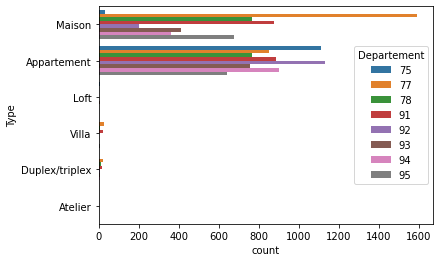

In [174]:
sns.countplot(y="Type", hue="Departement", data=immo)

In [196]:
villex.sort_values(by='Prix (€)').head(5)

,Type,Nombre de Pièces,Surface (m²),Prix (€),Departement,Code Postal,Emplacement,Description,Prix (€)/m²
7490,Maison,2,30,14000,77,77450,Condé-Sainte-Libiaire (77450),Vente chalet 2 pièces. iad france - virginie ...,466.666667
4686,Maison,4,40,15000,77,77450,Condé-Sainte-Libiaire (77450),Vente chalet 4 pièces. iad france - virginie ...,375.000000
7143,Maison,3,33,20000,77,77250,Veneux-les-Sablons (77250),Vente péniche 3 pièces. iad france - cécile m...,606.060606
2511,Maison,1,26,25000,77,77710,Paley (77710),Grange 26m² avec terraingrange de 26 m² proche...,961.538462
5467,Maison,2,70,38000,77,77570,Aufferville (77570),Vente grange 2 pièces. iad france - fabien ca...,542.857143


In [197]:
immo[immo['Surface (m²)']==1]

,Type,Nombre de Pièces,Surface (m²),Prix (€),Departement,Code Postal,Emplacement,Description,Prix (€)/m²
1856,Appartement,4,1,296800,94,94240,L'Haÿ-les-Roses (94240),3/4 pièces à l'hay-les-roses nouveau quartier ...,296800.0
2998,Appartement,4,1,480000,91,91300,Massy (91300),Appartement massy 4 pièce(s) 89.20 m2. a vendr...,480000.0
3288,Appartement,1,1,159000,77,77600,Bussy-Saint-Georges (77600),Appartement à 5min de bussy saint georges. sur...,159000.0
3749,Appartement,3,1,299900,95,95130,Franconville (95130),Appartement franconville 3 pièces 68.06 m² ple...,299900.0
4323,Appartement,2,1,598500,75,75016,Paris 16,Appartement 2 pièces. mirabeau - proche commer...,598500.0
5718,Appartement,3,1,269000,94,94310,Orly (94310),Appartement 3 pièces. votre agence l'adresse d...,269000.0
8895,Appartement,2,1,202000,93,93350,Le Bourget (93350),Appartement le bourget 2 pièce(s) 48.72 m2. a ...,202000.0
9190,Appartement,2,1,598500,75,75016,Paris 16,Appartement 2 pièces. mirabeau - proche commer...,598500.0
9687,Villa,9,1,2250000,93,93350,Le Bourget (93350),Demeure de prestige 9 pièce(s). surface terra...,2250000.0
11530,Villa,13,1,399000,77,77260,La Ferté-sous-Jouarre (77260),Longère de 13 pièces. 500 m2 - 20 minutes de l...,399000.0


In [190]:
villep = immo['Departement'].value_counts()
villep

77    2493
91    1802
78    1555
92    1343
95    1328
94    1276
93    1182
75    1153
Name: Departement, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Type'>

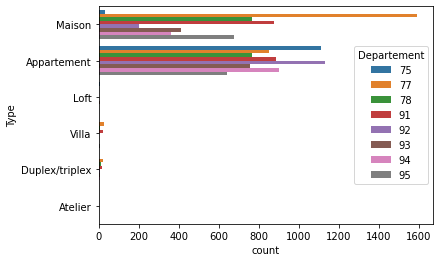

In [182]:
sns.countplot(y="Type", hue="Departement", data=immo)

[Text(0.5, 1.0, 'Prix des surfaces en vente')]

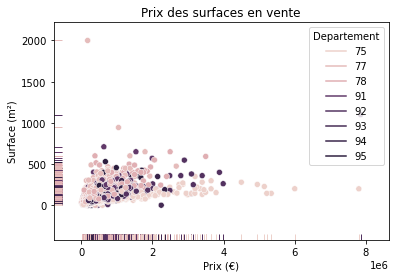

In [172]:
sns.scatterplot(x='Prix (€)', y = 'Surface (m²)', data = immo, hue = 'Departement')
sns.rugplot(x='Prix (€)', y = 'Surface (m²)', data = immo, hue = 'Departement').set(title='Prix des surfaces en vente')

In [195]:
immo[immo['Surface (m²)']>=2000]

,Type,Nombre de Pièces,Surface (m²),Prix (€),Departement,Code Postal,Emplacement,Description,Prix (€)/m²
1334,Maison,20,2000,183600,77,77167,Poligny (77167),Poligny - domaine equestre - 2000m². dans un e...,91.8


[Text(0.5, 1.0, 'Distribution between departments')]

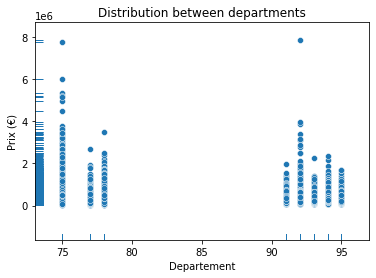

In [153]:
sns.scatterplot(x='Departement', y = 'Prix (€)', data = immo).set(title='Distribution between departments')
sns.rugplot(x='Departement', y = 'Prix (€)', data = immo).set(title='Distribution between departments')

In [93]:
not_exp= immo.sort_values(by='Prix (€)')
not_exp['Departement']= not_exp['Departement'].astype(str)
not_exp['Code Postal']= not_exp['Code Postal'].astype(str)

In [67]:
not_exp95 = not_exp[not_exp['Departement'] == '95']
not_exp94 = not_exp[not_exp['Departement'] == '94']
not_exp92 = not_exp[not_exp['Departement'] == '92']
not_exp91 = not_exp[not_exp['Departement'] == '91']
not_exp75 = not_exp[not_exp['Departement'] == '75']
not_exp78 = not_exp[not_exp['Departement'] == '78']
not_exp93 = not_exp[not_exp['Departement'] == '93']
not_exp77 = not_exp[not_exp['Departement'] == '77']

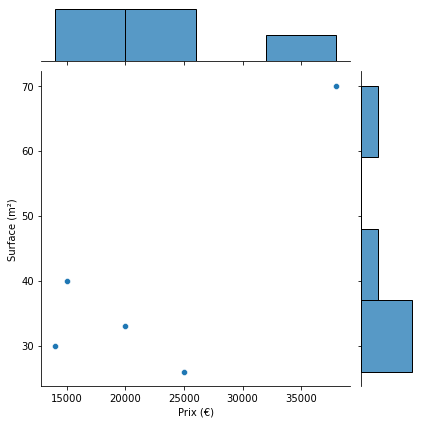

In [124]:
sns.jointplot(x="Prix (€)", y = 'Surface (m²)',data=not_exp77.head(5), )

<AxesSubplot:xlabel='Prix (€)', ylabel='Surface (m²)'>

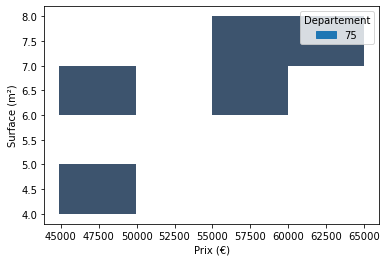

In [69]:
sns.histplot(x="Prix (€)", y = 'Surface (m²)',hue="Departement", data=not_exp75.head(5) )

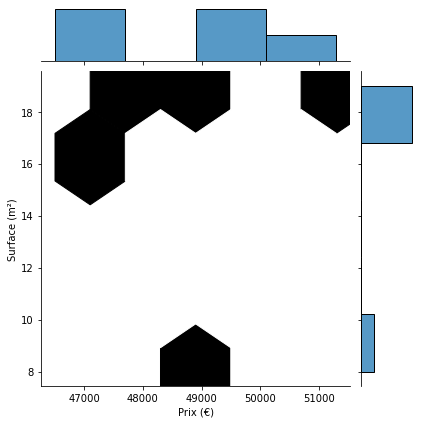

In [120]:
sns.jointplot(x="Prix (€)", y = 'Surface (m²)',data=not_exp78.head(5), kind='hex')

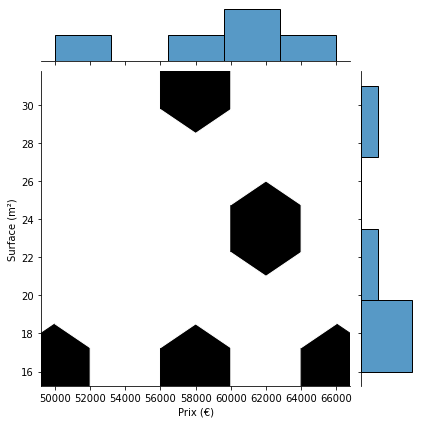

In [119]:
sns.jointplot(x="Prix (€)", y = 'Surface (m²)',data=not_exp91.head(5), kind='hex')

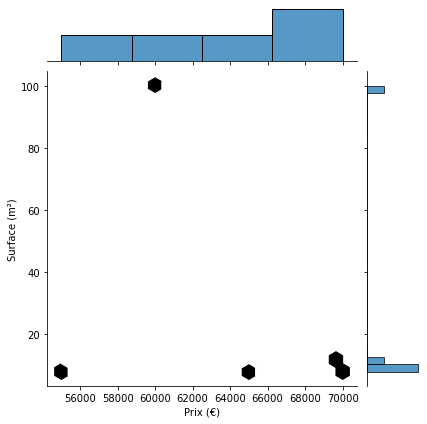

In [117]:
sns.jointplot(x="Prix (€)", y = 'Surface (m²)',data=not_exp92.head(5), kind='hex')

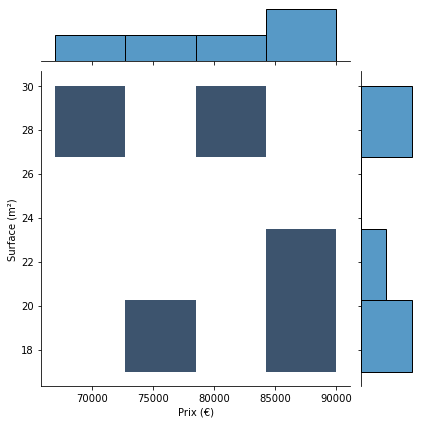

In [116]:
sns.jointplot(x="Prix (€)", y = 'Surface (m²)',data=not_exp95.head(5), kind='hist')

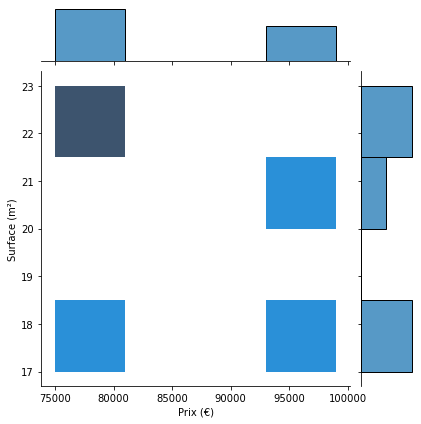

In [115]:
sns.jointplot(x="Prix (€)", y = 'Surface (m²)', data=not_exp93.head(5), kind = 'hist')

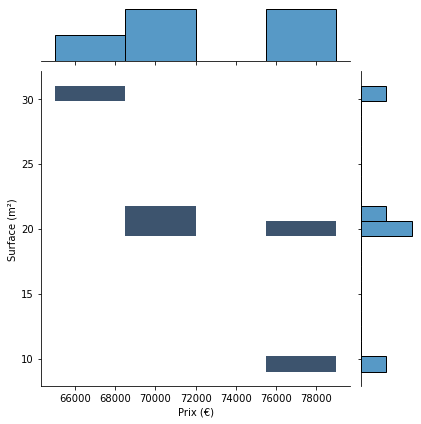

In [118]:
sns.jointplot(x="Prix (€)", y = 'Surface (m²)',data=not_exp94.head(5), kind='hist')

In [77]:
not_exp93.head(5)

,Type,Nombre de Pièces,Surface (m²),Prix (€),Departement,Code Postal,Emplacement,Description,Prix (€)/m²
9282,Appartement,1,23,75000,93,93150,Le Blanc-Mesnil (93150),Appart hotel f1 - studio meublé loué -1 etg- ...,3260.869565
2387,Appartement,1,22,77000,93,93120,La Courneuve (93120),T1. 93120 la courneuve - dernier etage - proch...,3500.000000
2490,Appartement,1,17,78000,93,93200,Saint-Denis (93200),Résidence affaires. réalisez un investissement...,4588.235294
8995,Appartement,1,17,93400,93,93200,Saint-Denis (93200),Résidence etudiante. réalisez un investissemen...,5494.117647
7370,Appartement,1,20,99000,93,93350,Le Bourget (93350),"Le bourget , 10 min du rer, studio vendu loue....",4950.000000


In [99]:
exp93 = not_exp93.sort_values(by='Prix (€)', ascending = False)

In [194]:
exp93.head(5)

,Type,Nombre de Pièces,Surface (m²),Prix (€),Departement,Code Postal,Emplacement,Description,Prix (€)/m²
9687,Villa,9,1,2250000,93,93350,Le Bourget (93350),Demeure de prestige 9 pièce(s). surface terra...,2.250000e+06
2770,Maison,6,151,1380000,93,93100,Montreuil (93100),Maison 4 chambres entre jardine et cour bucol...,9.139073e+03
9592,Maison,7,176,1350000,93,93100,Montreuil (93100),Montreuil. maison ecologique en bois bien rare...,7.670455e+03
9454,Maison,9,290,1330000,93,93340,Le Raincy (93340),Vente demeure 9 pièces. iad france - jean-gui...,4.586207e+03
10816,Maison,7,139,1248000,93,93100,Montreuil (93100),"Dpt seine saint denis (93), à vendre montreuil...",8.978417e+03


In [88]:
ville93 = exp93['Emplacement'].value_counts()

In [95]:
villeidf = immo['Emplacement'].value_counts()

In [96]:
villeidf.head()

Paris 18              143
Paris 20              135
Argenteuil (95100)    123
Montreuil (93100)     122
Paris 19              120
Name: Emplacement, dtype: int64

In [94]:
ville93.head()

Montreuil (93100)           122
Aulnay-sous-Bois (93600)     57
Drancy (93700)               56
Rosny-sous-Bois (93110)      56
Noisy-le-Grand (93160)       54
Name: Emplacement, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Emplacement'>

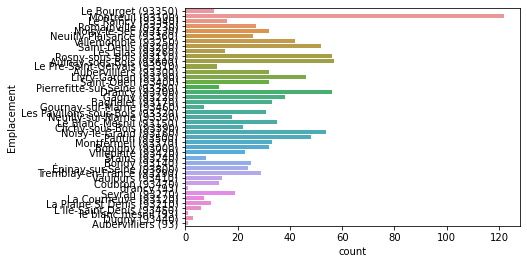

In [91]:
sns.countplot(y="Emplacement",  data=exp93)